In [1]:
#importing the necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#reading the data from CSV
dataset = pd.read_csv('/kaggle/input/polynomial-regression/Ice_cream selling data.csv')
X = dataset.iloc[:,0:1].values
y = dataset.iloc[:,-1].values

In [3]:
len(dataset.index)

49

In [4]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [5]:
#split into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
#Applyin Simple Regression to test the result
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [7]:
y_pred = lin_reg.predict(X_test)

In [8]:
lin_reg.predict([[4]])

array([[12.55286567]])

In [9]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

-30.375971246611176

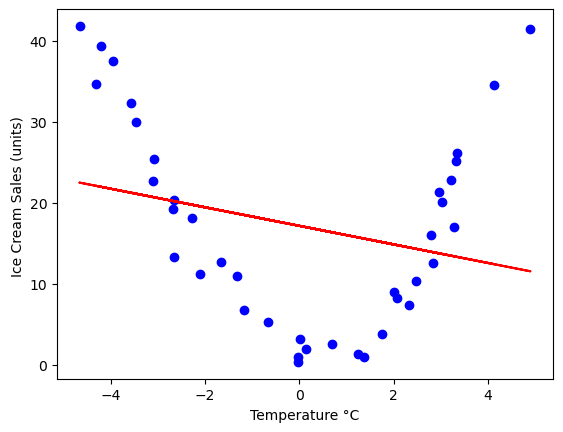

In [10]:
plt.scatter(X_train,y_train,color='blue')
plt.plot(X_train,lin_reg.predict(X_train),color='red')
plt.xlabel("Temperature °C")
plt.ylabel("Ice Cream Sales (units) ")
plt.show()

In [11]:
from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(degree=2)

In [12]:
poly = PolynomialFeatures(degree=3,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [13]:
print(X_train[0])
print(X_train_trans[0])

[-2.11186969]
[ 1.         -2.11186969  4.45999359 -9.41892528]


In [14]:
poly_reg = LinearRegression()
poly_reg.fit(X_train_trans,y_train)

LinearRegression()

In [15]:
r2_score(poly_reg.predict(X_test_trans),y_test)

0.8733453841138886

In [16]:
X_new=np.linspace(-5, 5, 49).reshape(49, 1)
X_new_poly = poly.transform(X_new)
y_new = poly_reg.predict(X_new_poly)

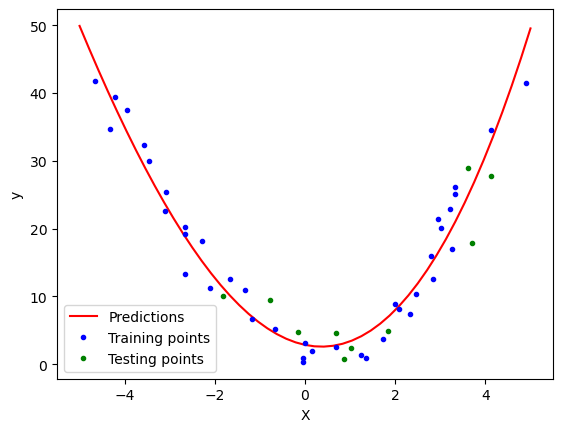

In [17]:
plt.plot(X_new, y_new, color='red', label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

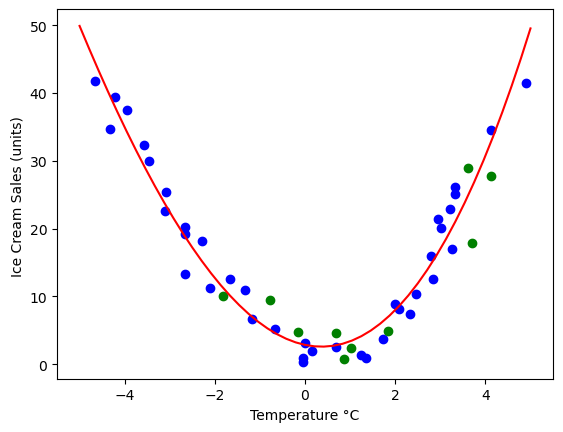

In [18]:
plt.scatter(X_train,y_train,color='blue')
plt.scatter(X_test,y_test,color='green')

plt.plot(X_new, y_new, color='red', label="Predictions")
plt.xlabel("Temperature °C")
plt.ylabel("Ice Cream Sales (units) ")
plt.show()